In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = Path ('/content/drive/MyDrive/dataset1-tiff')

In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(460),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)

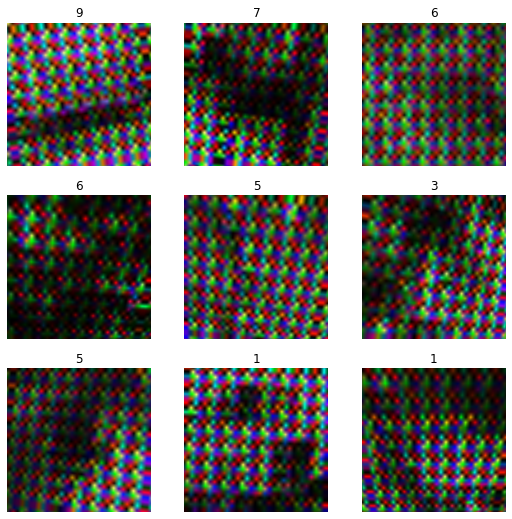

In [ ]:
dls.show_batch()

In [ ]:
# the model is resnet 18, can change to the different model by change the attribute 
learn = vision_learner(dls, models.resnet18, metrics = accuracy)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

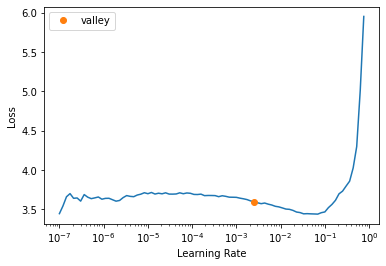

In [ ]:
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(18, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,2.415795,1.895052,0.318500,52:00
1,1.770444,1.627249,0.406600,01:53
2,1.599294,1.464214,0.463700,01:53
3,1.493611,1.388462,0.502000,01:53
4,1.411707,1.323001,0.515300,01:54
5,1.359704,1.279194,0.531200,01:54
6,1.293338,1.207398,0.562700,01:54
7,1.269484,1.193159,0.574400,01:54
8,1.235078,1.117879,0.599900,01:54
9,1.177622,1.091601,0.609000,01:53


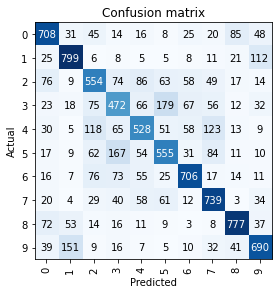

In [ ]:
# evaluate the model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.recorder.summary()

Sequential (Input shape: 64 x 3 x 460 x 460)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 230 x 230 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 115 x 115 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
# export the model
learn.export('/content/drive/MyDrive/Model/data1_Resnet18_8tiff.pkl')